In [1]:
import pandas as pd
import os

# Build combined dataframes for each EHR table

In [2]:
ehr_table_names = ['Demographic Information', 'Conditions', 'Medications', 'Allergies', 'Procedures', 'Test Results', 'Immunizations']

In [3]:
def get_filepaths(all_data_directory):
    directory = all_data_directory
    paths = []
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        if os.path.isdir(path+"/ehrs"):
            paths.append(path+"/ehrs")
    return paths

In [4]:
def read_table(path):
    df = pd.read_csv(path, delimiter = '\t')
    return df

def transform_table_demographics(df):
    df = df.transpose()
    df = df.iloc[2:]
    df.columns = ['Date of Birth', 'Gender', 'Weight', 'Height', 'Blood Type', 'Race']
    df.reset_index(drop = True, inplace=True)

    return df

def transform_table_generic(df):
    df.drop(df.columns[0], axis = 1, inplace = True)
    return df

def get_col_names(df):
    #df = df.transpose()
    return df.columns

def add_profileID_col(df, path):
    profile_id = path[-13:-5]
    df.insert(0, 'profile_id', profile_id)
    return df

def process_table_type(ehr_dir_path, filename):
    filepath = os.path.join(ehr_dir_path, filename)

    if "Demographic" in filename:
        df = read_table(filepath)
        df = transform_table_demographics(df)
        df = add_profileID_col(df, ehr_dir_path)
        global demo_info
        demo_info = pd.concat([demo_info, df])
        first_column = demo_info.pop('profile_id')
        demo_info.insert(0, 'profile_id', first_column)
    
    elif 'Conditions' in filename:
        df = read_table(filepath)
        df = transform_table_generic(df)
        df = add_profileID_col(df, ehr_dir_path)
        global conditions
        conditions = pd.concat([df, conditions])
        
    elif 'Medications' in filename:
        df = read_table(filepath)
        df = transform_table_generic(df)
        df = add_profileID_col(df, ehr_dir_path)
        global medications
        medications = pd.concat([df, medications])
        
    elif 'Allergies' in filename:
        df = read_table(filepath)
        df = transform_table_generic(df)
        df = add_profileID_col(df, ehr_dir_path)
        global allergies
        allergies = pd.concat([df, allergies])
        
    elif 'Procedures' in filename:
        df = read_table(filepath)
        df = transform_table_generic(df)
        df = add_profileID_col(df, ehr_dir_path)
        global procedures
        procedures = pd.concat([df, procedures])
        
    elif 'Test Results' in filename:
        df = read_table(filepath)
        df = transform_table_generic(df)
        df = add_profileID_col(df, ehr_dir_path)
        global test_results
        test_results = pd.concat([df, test_results])
        
    elif 'Immunizations' in filename:
        df = read_table(filepath)
        df = transform_table_generic(df)
        df = add_profileID_col(df, ehr_dir_path)
        global immunizations
        immunizations = pd.concat([df, immunizations])
    
    else:
        pass
        
    return None

def get_txt_profiles(txt_path):
    df = pd.read_csv(txt_path, delimiter = '\t', header = None)
    profiles = df[0].values.tolist()
    return profiles

def remove_intersecting_profiles(paths, provider_id):
    _23andMe_profiles = '/Users/jerenolsen/Desktop/Exploring PGP Harvard/23andMe/PGP_HVD_23andMe_complete_profiles.txt'
    CG_profiles = '/Users/jerenolsen/Desktop/Exploring PGP Harvard/Complete Genomics/PGP_HVD_CG_complete_profiles.txt'
    VG_profiles = '/Users/jerenolsen/Desktop/Exploring PGP Harvard/Veritas Genetics/PGP_HVD_VG_complete_profiles.txt'
    
    _23andMe = get_txt_profiles(_23andMe_profiles)
    CG = get_txt_profiles(CG_profiles)
    VG = get_txt_profiles(VG_profiles)
    
    if provider_id == '23andMe':
        pass #Keep all profiles
    elif provider_id == 'CG':
        paths = [path for path in paths if path[-13:-5] not in _23andMe]
    elif provider_id == 'VG':
        paths = [path for path in paths if path[-13:-5] not in _23andMe]
        paths = [path for path in paths if path[-13:-5] not in CG]
    else:
        return None
    
    return paths 
    

In [5]:
test_path = '/Users/jerenolsen/Desktop/Exploring PGP Harvard/Complete Genomics/all-data-by-profile/huCA017E/ehrs'

In [6]:
def read_and_update_tables(ehr_dir_path):
    for file in os.listdir(ehr_dir_path):
        process_table_type(ehr_dir_path, file)
        
    return None

def process_all_files(all_data_directory, provider_id):
    
    paths = get_filepaths(all_data_directory)
    paths = remove_intersecting_profiles(paths, provider_id)
    
    for path in paths:
        read_and_update_tables(path)
        
    all_tables = {'demo info': demo_info, 
                  'conditions': conditions, 
                  'medications':medications, 
                  'allergies': allergies, 
                  'procedures':procedures, 
                  'test results': test_results, 
                  'immunizations':immunizations}
        
    for key in all_tables.keys():
        table = all_tables[key]
        all_tables[key] = table.reset_index(drop = True)
        
    return all_tables

# Complete Genomics

In [7]:
demo_info = pd.DataFrame(columns=['Date of Birth', 'Gender', 'Weight', 'Height', 'Blood Type', 'Race'])
conditions = pd.DataFrame(columns = ['Name', 'Start Date', 'End Date'])
medications = pd.DataFrame(columns = ['Name', 'Dosage', 'Frequency', 'Start Date', 'End Date'])
allergies = pd.DataFrame(columns = ['Name', 'Reaction/Severity', 'Start Date', 'End Date'])
procedures = pd.DataFrame(columns = ['Name', 'Date'])
test_results = pd.DataFrame(columns = ['Name', 'Result', 'Date'])
immunizations = pd.DataFrame(columns = ['Name', 'Date'])

directory = '/Users/jerenolsen/Desktop/Exploring PGP Harvard/Complete Genomics/all-data-by-profile'
all_tables_CG = process_all_files(directory, provider_id = 'CG')
for key in all_tables_CG:
    print(f"Table {key.upper()}:\n {all_tables_CG[key]} \n ")

Table DEMO INFO:
     profile_id              Date of Birth  Gender          Weight  \
0     hu26B551  1961-12-27 (61 years old)     NaN   155lbs (70kg)   
1     hu70D651  1961-12-12 (61 years old)  Female   158lbs (72kg)   
2     huDBF9DD  1970-11-08 (52 years old)     NaN  280lbs (127kg)   
3     huA5BEB9                        NaN  Female             NaN   
4     hu57A769  1973-06-06 (49 years old)    Male   115lbs (52kg)   
..         ...                        ...     ...             ...   
119   huA0E089  1942-11-22 (80 years old)  Female   139lbs (63kg)   
120   hu602487  1945-08-09 (77 years old)  Female   117lbs (53kg)   
121   huAFA81C  1986-11-23 (36 years old)     NaN   200lbs (91kg)   
122   huA02824  1980-07-15 (42 years old)    Male   190lbs (86kg)   
123   hu604D39  1958-01-19 (65 years old)    Male  245lbs (111kg)   

               Height Blood Type                       Race  
0     5ft 7in (170cm)        NaN                        NaN  
1     5ft 9in (175cm)        

In [27]:
#DEBUGGING
len(demo_info)
demo_info.head()

,profile_id,Date of Birth,Gender,Weight,Height,Blood Type,Race
0,hu882406,1970-10-28 (52 years old),Male,152lbs (69kg),5ft 8in (172cm),O+,White
0,huA939D6,1946-07-06 (76 years old),Male,178lbs (81kg),NaN,A+,White
0,hu74C42F,1989-11-12 (33 years old),NaN,204lbs (93kg),5ft 10in (177cm),NaN,NaN
0,huB0DE0F,1967-05-17 (55 years old),Female,227lbs (103kg),5ft 6in (167cm),A-,White
0,hu094BE5,1933-11-25 (89 years old),NaN,NaN,NaN,NaN,NaN


## Complete Genomics Conditions Counts

In [9]:
df1 = conditions['Name'].value_counts()
df1.head(20)

ASTHMA                                             13
Allergies                                          11
Myopia                                             11
Sinusitis                                          10
Bronchitis                                         10
Pharyngitis                                        10
Chickenpox                                          9
DEPRESSION                                          9
Streptococcal Pharyngitis                           9
Hypertension                                        8
Nearsightedness                                     8
High Cholesterol                                    8
Attention Deficit Hyperactivity Disorder (ADHD)     8
Tonsillitis                                         7
Glaucoma                                            7
High blood pressure                                 7
Hay fever                                           6
Obesity                                             6
Anxiety                     

## Complete Genomics Cancer Occurences

In [10]:
df2 = conditions[conditions["Name"].str.contains('Cancer')]
df3 = conditions[conditions["Name"].str.contains('cancer')]
df4 = pd.concat([df2,df3])
df4.reset_index(drop=True, inplace=True)

In [11]:
df4.head(20)

,profile_id,Name,Start Date,End Date
0,huBA30D4,Prostate Cancer,NaN,NaN
1,hu1E868D,Breast Cancer,NaN,NaN
2,hu52B7E5,Breast Cancer,2006-07-17,NaN
3,hu8073B9,Nasal Cancer,1999-09-15,2002-01-30
4,hu6E4515,Colon Cancer,2005-12-31,2010-02-18
5,hu61466C,Prostate Cancer,2009-11-15,2010-03-12
6,hu92C40A,Breast Cancer,2010-10-01,NaN
7,huB1FD55,Skin Cancer,2009-01-01,2009-01-01
8,hu687B6B,endometrial cancer,1987-10-27,1989-10-27
9,hu04FD18,Basal cell skin cancer,1995-01-01,1995-01-01


## Complete Genomics Allergy Counts

In [12]:
df1 = allergies['Name'].value_counts()
df1.head(20)

Penicillins                       13
House Dust                         5
Pollen Extracts                    5
pollen                             4
Allergy to penicillin              3
Mold Extracts                      3
Cat Hair Std Extract               3
Honey Bee Venom Protein            3
Nothing                            2
Cat/Feline Product Derivatives     2
Cephalosporins                     2
Sulfa (Sulfonamides)               2
House dust allergy                 2
mold                               2
Grass Pollen-Kentucky Blu,Std      2
Gluten                             2
None                               2
Canine Proteins                    2
No Known Allergies                 2
dust mites                         2
Name: Name, dtype: int64

<AxesSubplot:title={'center':'CG Allergies'}, ylabel='Occurences'>

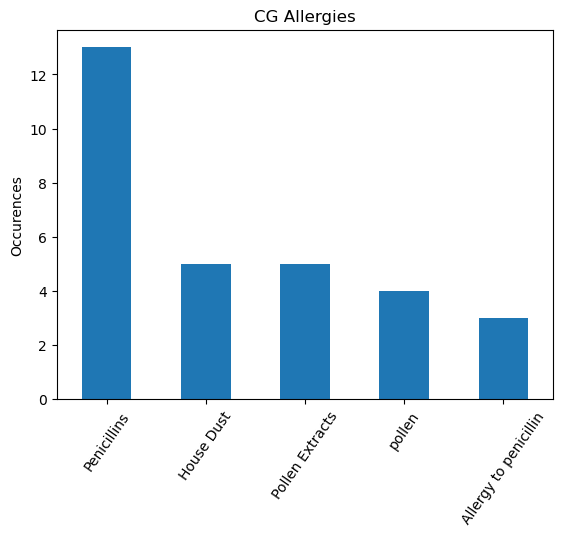

In [13]:
df1 = allergies['Name'].value_counts()
df1.head(20)
df1.iloc[0:5].plot.bar(ylabel = 'Occurences', title = 'CG Allergies', rot = 55)

# 23andMe 

In [14]:
demo_info = pd.DataFrame(columns=['Date of Birth', 'Gender', 'Weight', 'Height', 'Blood Type', 'Race'])
conditions = pd.DataFrame(columns = ['Name', 'Start Date', 'End Date'])
medications = pd.DataFrame(columns = ['Name', 'Dosage', 'Frequency', 'Start Date', 'End Date'])
allergies = pd.DataFrame(columns = ['Name', 'Reaction/Severity', 'Start Date', 'End Date'])
procedures = pd.DataFrame(columns = ['Name', 'Date'])
test_results = pd.DataFrame(columns = ['Name', 'Result', 'Date'])
immunizations = pd.DataFrame(columns = ['Name', 'Date'])

directory = '/Users/jerenolsen/Desktop/Exploring PGP Harvard/23andMe/all-data-by-profile'
all_tables_23andMe = process_all_files(directory, provider_id = '23andMe')
for key in all_tables_23andMe:
    print(f"Table {key.upper()}:\n {all_tables_23andMe[key]} \n ")

Table DEMO INFO:
     profile_id              Date of Birth  Gender          Weight  \
0     hu6ED94A  1950-08-05 (72 years old)    Male   128lbs (58kg)   
1     hu1DD730  1990-09-23 (32 years old)     NaN   188lbs (85kg)   
2     hu919BBA  1967-06-09 (55 years old)     NaN   185lbs (84kg)   
3     hu016B28  1962-08-02 (60 years old)    Male  290lbs (132kg)   
4     hu25E94B  1968-03-24 (54 years old)  Female             NaN   
..         ...                        ...     ...             ...   
306   huD0449C  1971-03-12 (51 years old)  Female   110lbs (50kg)   
307   hu5A0DFE  1972-03-27 (50 years old)     NaN   185lbs (84kg)   
308   huADA07D  1987-11-16 (35 years old)    Male   135lbs (61kg)   
309   hu2FEC01  1985-10-06 (37 years old)     NaN   148lbs (67kg)   
310   huF0B9DB  1972-08-13 (50 years old)     NaN  232lbs (105kg)   

               Height Blood Type                              Race  
0     5ft 7in (170cm)         O+                             White  
1     5ft 3in (

## 23andMe EHR Conditions Occurences

In [15]:
df1 = conditions['Name'].value_counts()
df1.head(20)

ASTHMA                                             30
High Cholesterol                                   22
DEPRESSION                                         20
Nearsightedness                                    20
Astigmatism                                        18
Hypothyroidism                                     18
CYSTOID MACULAR DEGENERATION                       18
Hypertension                                       14
Myopia                                             13
High blood pressure                                12
Anxiety                                            12
Chickenpox                                         12
Sleep Apnea                                        12
Attention Deficit Hyperactivity Disorder (ADHD)    11
Gastroesophageal Reflux Disease (GERD)             11
Acid reflux                                        10
HYPERCHOLESTEROLEMIA                               10
Kidney stones                                      10
Major Depression            

In [16]:
df_diab = conditions[conditions['Name'].str.contains('diab') == True]
df_diab.head()

,profile_id,Name,Start Date,End Date
3,huAF469C,diabetes type 2,NaN,NaN
10,hu30888B,Prediabetes,NaN,NaN


## 23andME EHR Cancer Occurences

In [17]:
df2 = conditions[conditions["Name"].str.contains('Cancer')]
df3 = conditions[conditions["Name"].str.contains('cancer')]
df4 = pd.concat([df2,df3])
df4.reset_index(drop=True, inplace=True)

In [18]:
df4.head(20)

,profile_id,Name,Start Date,End Date
0,hu868880,Kidney Cancer,NaN,NaN
1,hu4CFB79,Breast Cancer,2009-01-01,NaN
2,hu524B5B,Breast Cancer,2004-03-23,NaN
3,hu56B3B6,Skin Cancer,NaN,NaN
4,hu14262A,Skin Cancer (Basal Cell),2010-01-01,NaN
5,huD889CC,Prostate Cancer,NaN,NaN
6,hu6ED94A,Prostate Cancer,2011-05-01,NaN
7,hu9CEB09,Removal of ovary and borderline ovarian cancer...,2001-04-13,2001-06-22
8,hu56B3B6,Basal cell skin cancer,2011-02-16,2011-08-24
9,hu56B3B6,Basal cell skin cancer,NaN,NaN


## 23andMe EHR Allergy Counts

<AxesSubplot:title={'center':'23andMe Allergies'}, ylabel='Occurences'>

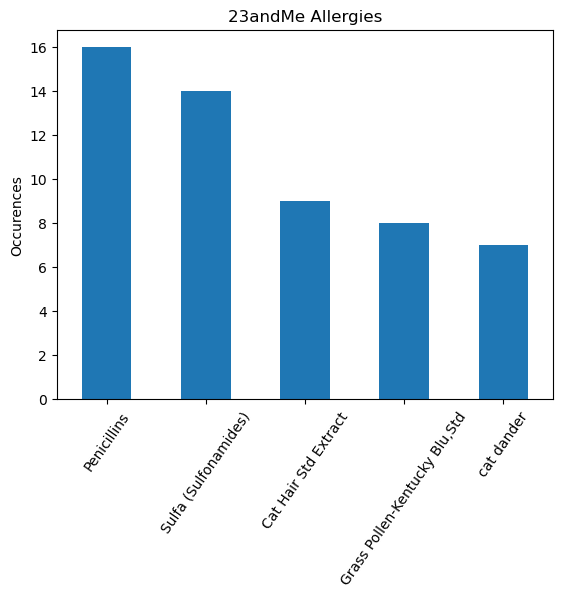

In [19]:
df1 = allergies['Name'].value_counts()
df1.head(20)
df1.iloc[0:5].plot.bar(ylabel = 'Occurences', title = '23andMe Allergies', rot = 55)

## 23andMe Test Results

In [20]:
df1 = test_results
df1 = df1[df1.Name.str.contains('eight') == False]
df1 = df1[df1.Name.str.contains('Fat Mass') == False]
df1 = df1[df1.Name.str.contains('Calor') == False]
unique = df1['profile_id'].value_counts()
#df1 = test_results[test_results['Name'].str.contains('Weight') == False]
#f1 = test_results[test_results['Name'].str.contains('Fat Mass') == False]
unique

hu96713F    2771
huD57BBF    1305
hu7A2F1D     489
huEDF7DA     461
huF9E138     271
            ... 
hu024B5D       1
hu9AE5EE       1
hu4F8813       1
hu939B7C       1
hu2D53F2       1
Name: profile_id, Length: 151, dtype: int64

## 23andMe Procedures

In [21]:
df1 = procedures
unique = df1['Name'].value_counts()
unique

PROFF SERVICES FOR ALLERGEN IMMUNOTHERAPY MULTI INJECT    69
Appendectomy                                              21
Therapeutic exercise                                      20
Tonsillectomy                                             20
Procedure S8838                                           19
                                                          ..
Uterine Ablation                                           1
Excision of a Basal Cell                                   1
Excision of a skin cancer - Basal Cell                     1
Replacement of a cataract with intraocular lens            1
MRA Brain - With and Without Contrast                      1
Name: Name, Length: 679, dtype: int64

# Veritas Genetics

In [22]:
demo_info = pd.DataFrame(columns=['Date of Birth', 'Gender', 'Weight', 'Height', 'Blood Type', 'Race'])
conditions = pd.DataFrame(columns = ['Name', 'Start Date', 'End Date'])
medications = pd.DataFrame(columns = ['Name', 'Dosage', 'Frequency', 'Start Date', 'End Date'])
allergies = pd.DataFrame(columns = ['Name', 'Reaction/Severity', 'Start Date', 'End Date'])
procedures = pd.DataFrame(columns = ['Name', 'Date'])
test_results = pd.DataFrame(columns = ['Name', 'Result', 'Date'])
immunizations = pd.DataFrame(columns = ['Name', 'Date'])

directory = '/Users/jerenolsen/Desktop/Exploring PGP Harvard/Veritas Genetics/all-data-by-profile'
all_tables_CG = process_all_files(directory, provider_id = 'VG')
for key in all_tables_CG:
    print(f"Table {key.upper()}:\n {all_tables_CG[key]} \n ")

Table DEMO INFO:
    profile_id              Date of Birth  Gender          Weight  \
0    hu882406  1970-10-28 (52 years old)    Male   152lbs (69kg)   
1    huA939D6  1946-07-06 (76 years old)    Male   178lbs (81kg)   
2    hu74C42F  1989-11-12 (33 years old)     NaN   204lbs (93kg)   
3    huB0DE0F  1967-05-17 (55 years old)  Female  227lbs (103kg)   
4    hu094BE5  1933-11-25 (89 years old)     NaN             NaN   
5    hu5E3021  1956-10-20 (66 years old)     NaN   122lbs (55kg)   
6    hu4A9989  1980-08-07 (42 years old)     NaN   167lbs (76kg)   
7    huE5A9A3  1953-01-01 (70 years old)     NaN   215lbs (98kg)   
8    hu1FD496  1959-06-23 (63 years old)    Male   180lbs (82kg)   
9    hu6A8D30                        NaN     NaN   137lbs (62kg)   
10   huCF305F  1942-10-11 (80 years old)    Male   139lbs (63kg)   
11   hu63165B  1959-01-30 (64 years old)    Male   160lbs (73kg)   
12   hu2C27FF  1981-03-02 (42 years old)     NaN  325lbs (147kg)   
13   hu6E004A  1963-09-19 (59 

In [23]:
df1 = conditions['Name'].value_counts()
df1.head(20)

Sinusitis, chronic                    3
Sleep Apnea                           2
Concussion                            2
Hemorrhoids                           2
Hernia, Abdominal                     2
High Cholesterol                      2
Epididymitis                          2
Tonsillitis                           2
gerd                                  2
Hypothyroidism                        2
Seborrheic Dermatitis                 2
alchoholic, non-drinking              2
chlamydosis avian                     2
Hepatitis B Core Antibody Positive    1
Geographic tongue                     1
Gonorrhea                             1
Phlebitis                             1
Peripheral Neuropathy                 1
Osteoarthritis                        1
Nevi                                  1
Name: Name, dtype: int64

In [24]:
df2 = conditions[conditions["Name"].str.contains('Cancer')]
df3 = conditions[conditions["Name"].str.contains('cancer')]
df4 = pd.concat([df2,df3])
df4.reset_index(drop=True, inplace=True)

In [25]:
df4.head(20)

,profile_id,Name,Start Date,End Date


In [26]:
df1 = allergies['Name'].value_counts()
df1.head(20)

Multiple environmental allergies    1
grasses                             1
Penicillins                         1
Dog                                 1
Lidocaine                           1
tree pollen                         1
mountain cedar                      1
molds                               1
cat dander                          1
animal allergy                      1
Oxycodone                           1
Bee Stings                          1
Allergy to penicillin               1
contrast dye                        1
IV Demerol                          1
Seasonal allergy                    1
Ragweed                             1
Name: Name, dtype: int64